In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image, display
import matplotlib.image as mpimg
from matplotlib import rcParams

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [7]:
image1 = 'C:\\Users\sahana\Desktop\Sentosa.jpg'
image2 = 'C:\\Users\sahana\Desktop\Versicolor.jpg'
image3 = 'C:\\Users\sahana\Desktop\Viriginica.jpg'

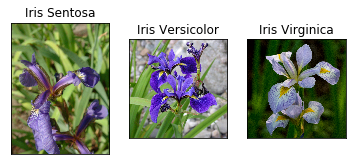

In [9]:
img_A = mpimg.imread(image1)
img_B = mpimg.imread(image2)
img_C = mpimg.imread(image3)

fig, axes = plt.subplots(1,3, frameon= False)

axes[0].imshow(img_A)
axes[0].set_title('Iris Sentosa')
axes[1].imshow(img_B)
axes[1].set_title('Iris Versicolor')
axes[2].imshow(img_C)
axes[2].set_title('Iris Virginica')

for ax in axes:
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

In [11]:
import pandas_profiling as pp

In [12]:
pp.ProfileReport(iris)

C:\Users\sahana\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,5
Number of observations,150
Total Missing (%),0.0%
Total size in memory,6.0 KiB
Average record size in memory,40.9 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [40]:
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


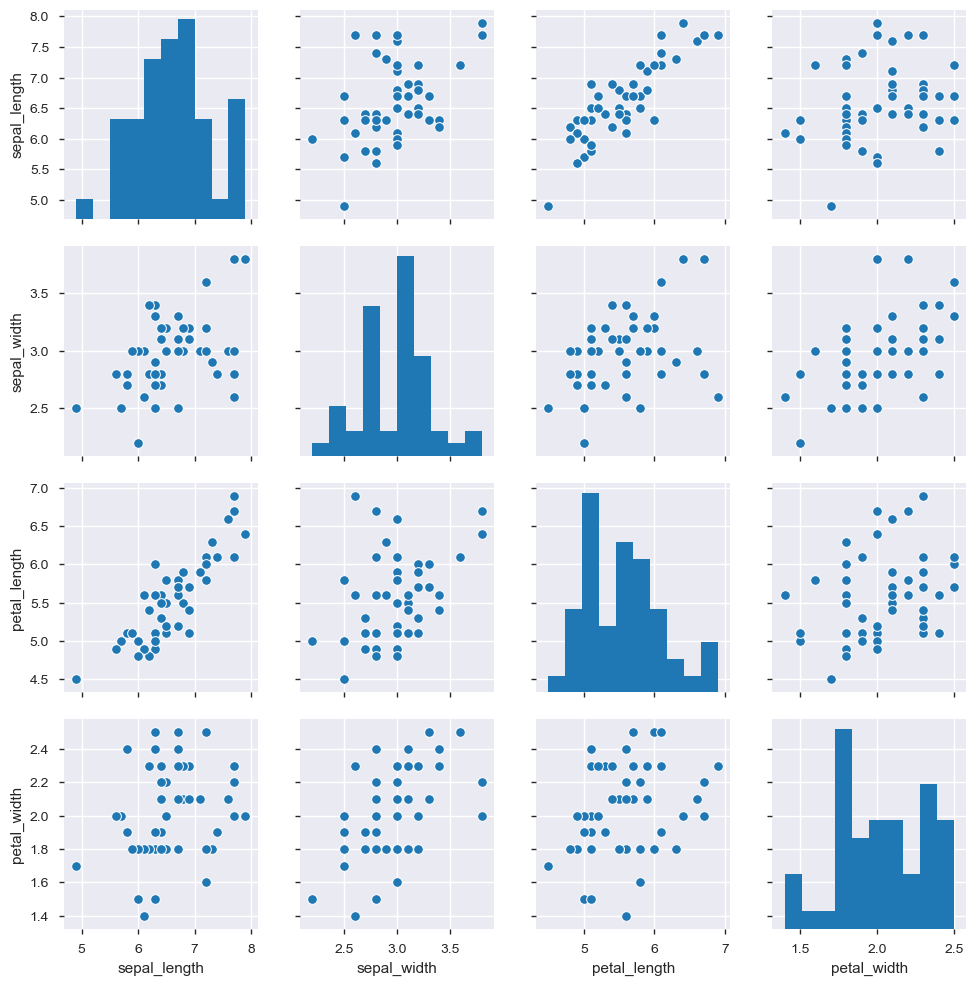

In [41]:
sns.pairplot(iris[iris['species']=='virginica'])

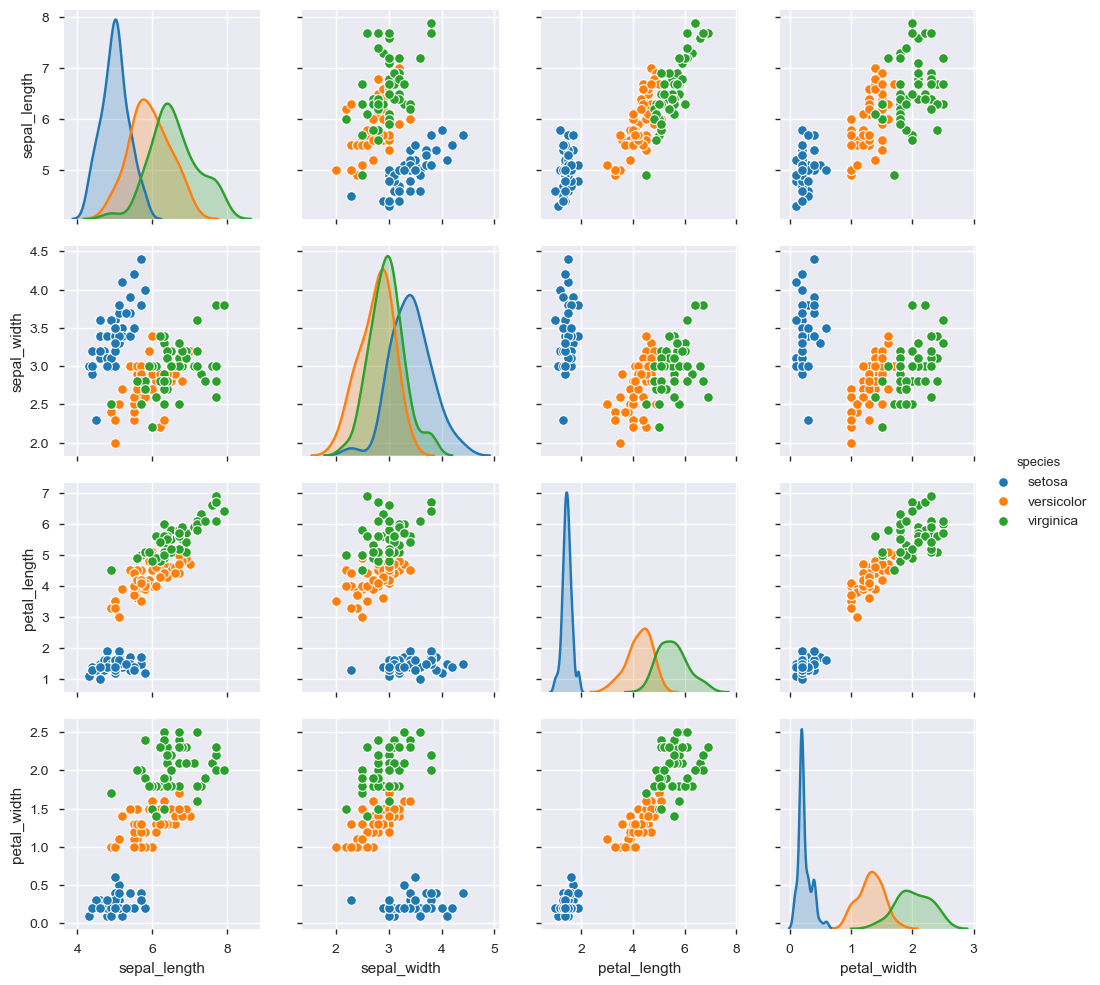

In [14]:
sns.pairplot(iris, hue ='species')

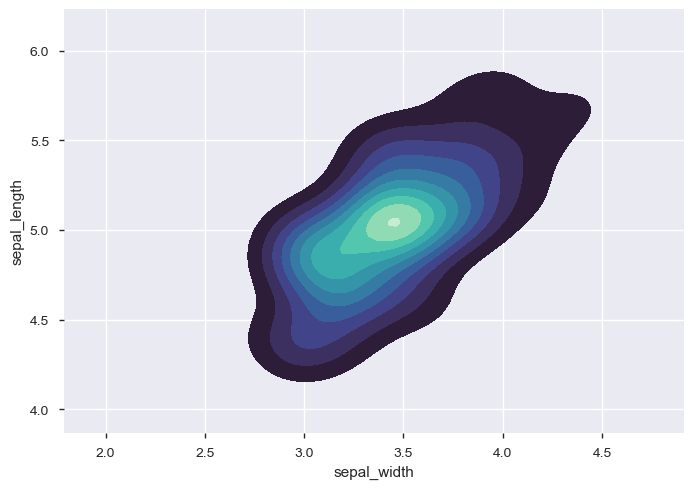

In [51]:
sns.kdeplot(iris[iris['species']=='setosa']['sepal_width'], iris[iris['species']=='setosa']['sepal_length'],cmap ='mako',shade=True,shade_lowest=False)

In [53]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [54]:
le = preprocessing.LabelEncoder()
le.fit(iris['species'])
y = le.transform(iris['species'])
x = iris.drop(['species'], axis=1)

In [65]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state =42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size =0.25, random_state =42)


In [87]:
len(x_train)

90

In [89]:
len(x_val)

30

In [79]:
from sklearn.svm import SVC

In [80]:
model1 = SVC()

In [101]:
model1.fit(x_train, y_train)

C:\Users\sahana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [95]:
model1.score(x_test,y_test)

1.0

In [96]:
predictions1 = model1.predict(pd.concat([x_test,x_val], axis = 0))

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
print(confusion_matrix(pd.concat([pd.Series(y_test), pd.Series(y_val)], axis = 0), predictions1))

[[19  0  0]
 [ 0 20  2]
 [ 0  0 19]]


In [99]:
print(classification_report(pd.concat([pd.Series(y_test),pd.Series(y_val)],axis=0),predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.91      0.95        22
           2       0.90      1.00      0.95        19

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

